In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from collections import defaultdict

In [32]:
df = pd.read_csv("../Google Scholar AI&ML Papers(in).csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              6800 non-null   object
 1   Abstract           5477 non-null   object
 2   Authors            6755 non-null   object
 3   Year               6800 non-null   int64 
 4   URL                6800 non-null   object
 5   Citations          6800 non-null   int64 
 6   Journal            5868 non-null   object
 7   Venue              6477 non-null   object
 8   Publication Types  6194 non-null   object
dtypes: int64(2), object(7)
memory usage: 478.3+ KB


In [34]:
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4479 entries, 0 to 6798
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              4479 non-null   object
 1   Abstract           4479 non-null   object
 2   Authors            4479 non-null   object
 3   Year               4479 non-null   int64 
 4   URL                4479 non-null   object
 5   Citations          4479 non-null   int64 
 6   Journal            4479 non-null   object
 7   Venue              4479 non-null   object
 8   Publication Types  4479 non-null   object
dtypes: int64(2), object(7)
memory usage: 349.9+ KB


In [36]:
df

,Title,Abstract,Authors,Year,URL,Citations,Journal,Venue,Publication Types
0,Fashion-MNIST: a Novel Image Dataset for Bench...,"We present Fashion-MNIST, a new dataset compri...","Han Xiao, Kashif Rasul, Roland Vollgraf",2017,https://www.semanticscholar.org/paper/f9c602cc...,8315,ArXiv,arXiv.org,JournalArticle
1,TensorFlow: Large-Scale Machine Learning on He...,TensorFlow is an interface for expressing mach...,"Martín Abadi, Ashish Agarwal, P. Barham, E. Br...",2016,https://www.semanticscholar.org/paper/9c9d7247...,10959,ArXiv,arXiv.org,JournalArticle
6,Open Graph Benchmark: Datasets for Machine Lea...,"We present the Open Graph Benchmark (OGB), a d...","Weihua Hu, Matthias Fey, M. Zitnik, Yuxiao Don...",2020,https://www.semanticscholar.org/paper/597bd2e4...,2501,ArXiv,Neural Information Processing Systems,JournalArticle
8,A Survey on Bias and Fairness in Machine Learning,With the widespread use of artificial intellig...,"Ninareh Mehrabi, Fred Morstatter, N. Saxena, K...",2019,https://www.semanticscholar.org/paper/0090023a...,3862,ACM Computing Surveys (CSUR),ACM Computing Surveys,"JournalArticle, Review"
9,Membership Inference Attacks Against Machine L...,We quantitatively investigate how machine lear...,"R. Shokri, M. Stronati, Congzheng Song, Vitaly...",2016,https://www.semanticscholar.org/paper/f0dcc9aa...,3802,2017 IEEE Symposium on Security and Privacy (SP),IEEE Symposium on Security and Privacy,JournalArticle
...,...,...,...,...,...,...,...,...,...
6794,Hardware acceleration of hidden Markov model d...,This paper explores methods for hardware accel...,"Suhaib A. Fahmy, P. Cheung, W. Luk",2005,https://www.semanticscholar.org/paper/e1f92f95...,13,"Design, Automation and Test in Europe","Design, Automation and Test in Europe","Book, JournalArticle"
6795,Sibia: Signed Bit-slice Architecture for Dense...,Deep neural networks (DNNs) have achieved high...,"Dongseok Im, Gwangtae Park, Zhiyong Li, Junha ...",2023,https://www.semanticscholar.org/paper/032ea91b...,7,2023 IEEE International Symposium on High-Perf...,International Symposium on High-Performance Co...,JournalArticle
6796,MutateNN: Mutation Testing of Image Recognitio...,The increased utilization of Artificial Intell...,"Nikolaos Louloudakis, Perry Gibson, José Cano,...",2023,https://www.semanticscholar.org/paper/c1e6a1d7...,2,ArXiv,arXiv.org,JournalArticle
6797,Exploiting On-Chip Heterogeneity of Versal Arc...,Graph Neural Networks (GNNs) have revolutioniz...,"Paul Chen, Pavan Manjunath, Sasindu Wijeratne,...",2023,https://www.semanticscholar.org/paper/68352ea2...,7,2023 33rd International Conference on Field-Pr...,International Conference on Field-Programmable...,"JournalArticle, Conference"


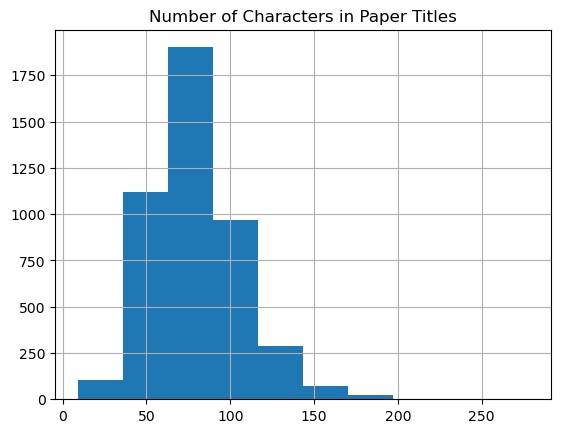

In [37]:
ax = df['Title'].str.len().hist()
ax.set_title("Number of Characters in Paper Titles")
plt.show()

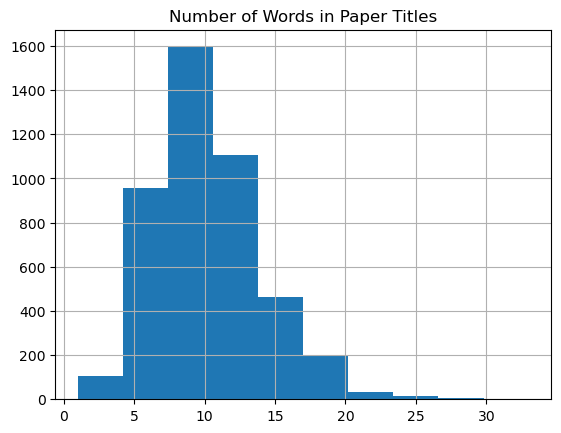

In [38]:
ax = df['Title'].str.split().map(lambda x: len(x)).hist()
ax.set_title("Number of Words in Paper Titles")
plt.show()

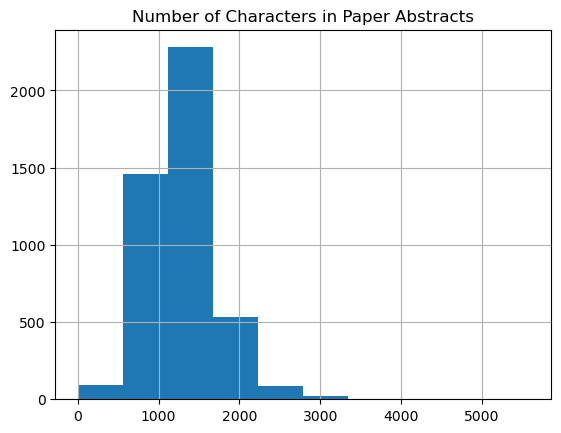

In [39]:
ax = df['Abstract'].str.len().hist()
ax.set_title("Number of Characters in Paper Abstracts")
plt.show()

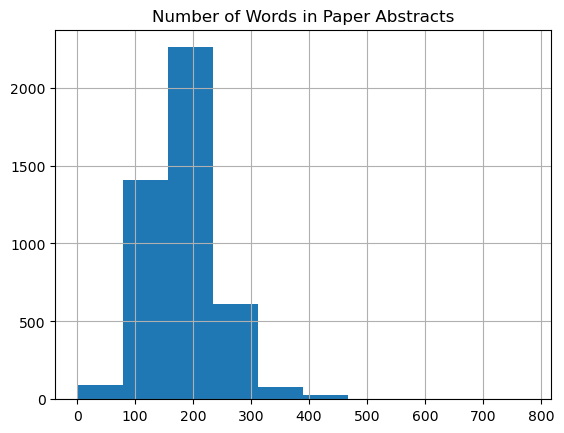

In [41]:
ax = df['Abstract'].str.split().map(lambda x: len(x)).hist()
ax.set_title("Number of Words in Paper Abstracts")
plt.show()

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Title'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['Abstract'] = df['Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /home/peter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<Axes: >

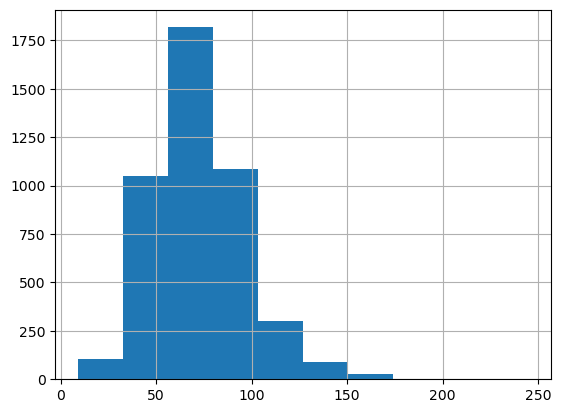

In [12]:
df['Title'].str.len().hist()

<Axes: >

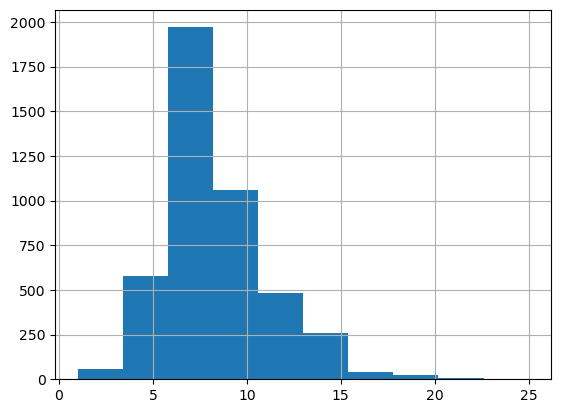

In [13]:
df['Title'].str.split().map(lambda x: len(x)).hist()

<Axes: >

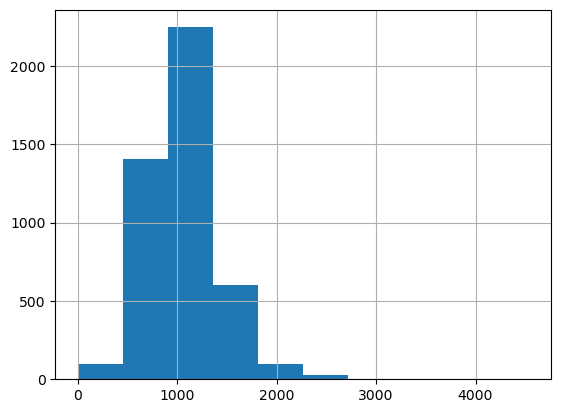

In [14]:
df['Abstract'].str.len().hist()

<Axes: >

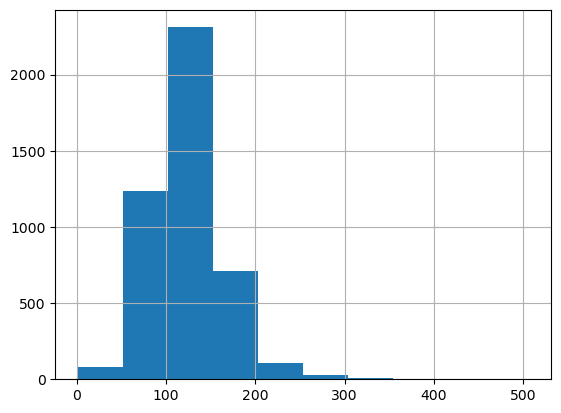

In [15]:
df['Abstract'].str.split().map(lambda x: len(x)).hist()